#Hands on linear regression and logistic regression



## A. Step by step linear regression using the ”bats” data


### A.1 Correlation circles

### 1. Open the dataset tabbats


In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from statsmodels.graphics.gofplots import ProbPlot
from mod import mymod_function,QQ,leverage_plot,scale_location,residualVSfitted
    
tab = pd.read_csv('tabbats.txt',sep=" ")
tab

,id,Species,Diet,BOW,BRW,AUD,MOB,HIP
0,1,Rousettus aegyptiacus,1,136.30,2070.00,9.88,105.77,125.97
1,2,Epomops franqueti,1,120.00,2210.00,10.44,107.80,159.80
2,3,Eonycteris spelaea,1,58.70,1310.00,5.48,67.00,97.70
3,4,Cynopterus sphinx,1,48.30,1184.33,4.77,65.27,95.40
4,5,Dobsonia praedatrix,1,184.00,3028.00,7.09,213.43,233.30
5,6,Glossophaga soricina,1,10.60,414.00,3.74,12.20,35.00
6,7,Leptonycteris curasoae,1,24.50,610.00,5.57,18.60,44.95
7,8,Macroglossus miniumus,1,14.60,561.00,2.40,30.05,52.95
8,9,Syconycteris australis,1,14.70,570.00,2.13,31.40,53.10
9,10,Nyctimene albiventer,1,29.70,825.00,4.56,68.93,81.40



### 2. Display the content of the variable tab. What can you say about the different attributes ?

  The description of our dataset:

*  Species = The name of the observed species
*   Diet (1 = phytophage ; 2 = gleaner ; 3 = aerial insectivore ; 4 = vampire)
*   BOW = Body mass
*   BRW = Brain mass
*   AUD = Auditory nuclei volume
*   MOB = Main olfactory bulb volume
*   HIP = Hippocampus volume

You can see above the type of all of these attributes.


In [90]:
print('\n',"Dataset infos")
print(tab.info(),'\n')

print("Attributes type")
print(tab.dtypes,'\n')

print("Description of the dataset")
tab.describe()


 Dataset infos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 8 columns):
id         29 non-null int64
Species    29 non-null object
Diet       29 non-null int64
BOW        29 non-null float64
BRW        29 non-null float64
AUD        29 non-null float64
MOB        29 non-null float64
HIP        29 non-null float64
dtypes: float64(5), int64(2), object(1)
memory usage: 1.9+ KB
None 

Attributes type
id           int64
Species     object
Diet         int64
BOW        float64
BRW        float64
AUD        float64
MOB        float64
HIP        float64
dtype: object 

Description of the dataset


,id,Diet,BOW,BRW,AUD,MOB,HIP
count,29.000000,29.0,29.000000,29.000000,29.000000,29.000000,29.000000
mean,23.517241,1.0,87.418966,1410.206897,8.309310,58.960345,83.413103
std,14.151276,0.0,188.854548,1743.787118,5.447478,63.338129,74.917224
min,1.000000,1.0,8.900000,319.000000,2.130000,7.300000,17.100000
25%,8.000000,1.0,16.000000,570.000000,4.770000,18.800000,41.400000
50%,28.000000,1.0,27.670000,814.000000,5.980000,30.770000,52.950000
75%,35.000000,1.0,58.700000,1338.000000,10.440000,68.930000,95.400000
max,42.000000,1.0,1014.000000,9121.000000,27.600000,243.540000,331.290000


Some of its attributes have a very high standard deviation, so we will have to be careful about potential outliers.

### 3. Prompt the classes of the different attributes using the command str(tab). Remove from tab all attributes that may not be useful for a correlation analysis.

### Interpretation
We have decided to drop the ID,  and the name of species because  theses informations will not be correlated. 
Beside the number Diet is always the same so it isn't interessting for us. 

In [91]:
tab = tab.drop(["id","Species","Diet"],axis=1)
tab.head()

,BOW,BRW,AUD,MOB,HIP
0,136.3,2070.00,9.88,105.77,125.97
1,120.0,2210.00,10.44,107.80,159.80
2,58.7,1310.00,5.48,67.00,97.70
3,48.3,1184.33,4.77,65.27,95.40
4,184.0,3028.00,7.09,213.43,233.30


### 4. We want to do a quick Principal component analysis of this data set and draw the correlation circle in order to find correlated variables.

Knowing that we use python, we had to code a function to display the circle. This function is available in the appendix.


**Interpretation** :




*   We can see on the plot that we keep 93% of the variance if we want to represent the dataset in 2 dimensions 
*   The dimension with the most explained variance is called PC-0 and plotted on the horizontal axes (79%)
*   The second-most explanatory dimension is called PC-1 and placed on the vertical axis (14%)
*   Since most of the variables are pointing to the right, they are at least somewhat correlating on this first principal component PC-0
*   The BRW and the BOW attributes are bunched right close together(pointing rigth)
*   The HIP and MOB attributes are also bunched up somewhere else close together (pointing right and down)
*   It seems to have no correlation between AUD and the rest of the dataset



### 5. According to the previous question, which variables are the most correlated ?


 - The brain mass and the body mass are the most correlated
 - The hippocampus volume and the main olfactory bulb volume are the most correlated

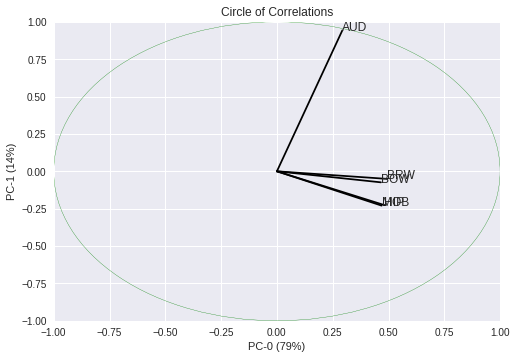

In [92]:
from MyPCALib import myPCA
myPCA(tab)

### A.2 First linear regression using Python

### 1. We are interested in finding whether there is a link between the body mass of a bat (BOW) and its brain mass (BRW):

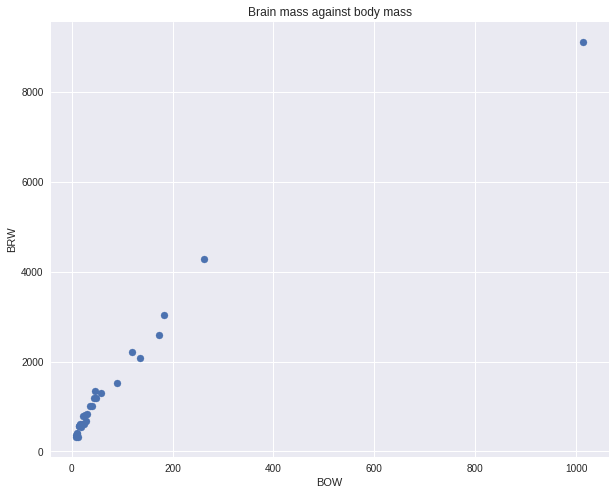

In [93]:
fig,axes = plt.subplots(figsize=(10,8))
plt.scatter(tab['BOW'],tab['BRW'])
plt.xlabel("BOW")
plt.ylabel("BRW")
plt.title('Brain mass against body mass')

my_x = tab['BOW']
my_y = tab['BRW']

### Interpretation :

We can make the hypothesis that the linked beetween BOW and BRW is linear. We will need to pay attention the to the upper-right value which seems to be an outlier.

We therefore look for the parameters m and b to satisfy an equation of the type: mx+b with m and b minimizing the error between the predicted value and the actual value.


### 2. Use the command mod=lm(tab$BRW∼tab$BOW) to start the linear regression. Display the variable mod to know the regression coefficients

Knowing that we use python, we had to code a function to obtain the equivalent of the function in R. This function is available in the appendix.



*   The intercept b is equal to 623.4469 with a standard error of 81.476
*   The slope m is equal to 8.9999 with a standard error of 0.397

So we can determine that one possible equation of linear regression is :

BRW= BOW*8.9999+ 623.4469


The Adj R-squared value  is equal to 0.948, it means that this model explains 94.8% of the variance in our dependent variable.

The Prob(Omnibus) is equal to 0 which  indicates that the residulas are not normaly distributed.

In [94]:
inputmodel = 'BRW ~ BOW'
mod = mymod_function(tab,inputmodel)

intercept = mod[0].params[0]
slope = mod[0].params[1]

                            OLS Regression Results                            
Dep. Variable:                    BRW   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     513.4
Date:                Thu, 08 Nov 2018   Prob (F-statistic):           4.21e-19
Time:                        19:18:26   Log-Likelihood:                -213.64
No. Observations:                  29   AIC:                             431.3
Df Residuals:                      27   BIC:                             434.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    623.4469     81.476      7.652      0.0

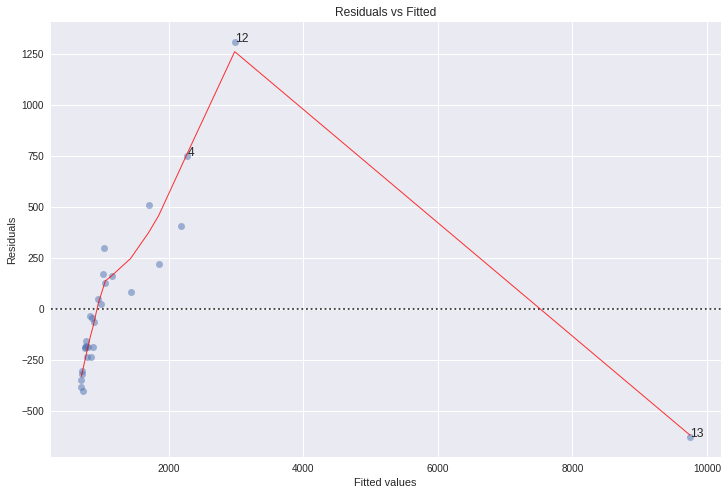

In [95]:
residualVSfitted(mod[0],'BRW',tab,mod[5],mod[2],mod[1])

####Residuals vs Fitted :

*   The first graphic with Residuals vs Fitted values is quite important to determine the validity of our linear-model. 
*  When the model is quite representative the coefficent director of the red line is near to 0, 
* that's isn't our case 

So we are going to take a glance to another indicators to determine how we can improve our modelisation

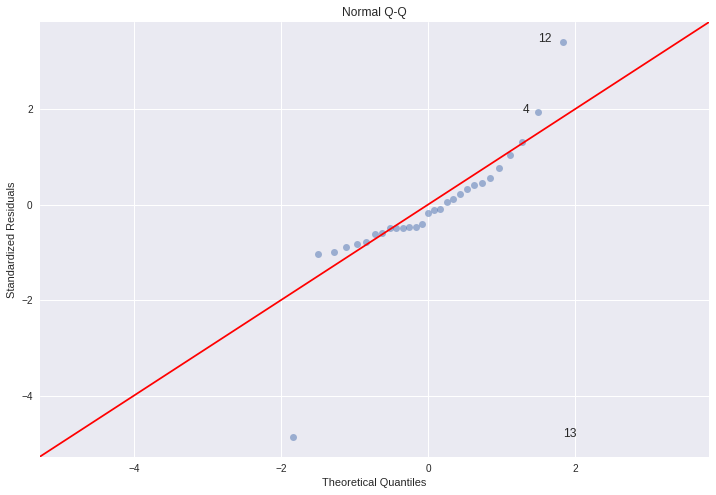

In [96]:
QQ(mod[3])

#### Normal Quantiles

Let's check if residuals are normally distributed by looking at the Normal Q-Q.



*   The residuals are  lined well on the straight dashed line but we can do better  
*   13th element seems to be an outlier 
*   Our assumption seems to be plausable but we can improve our model

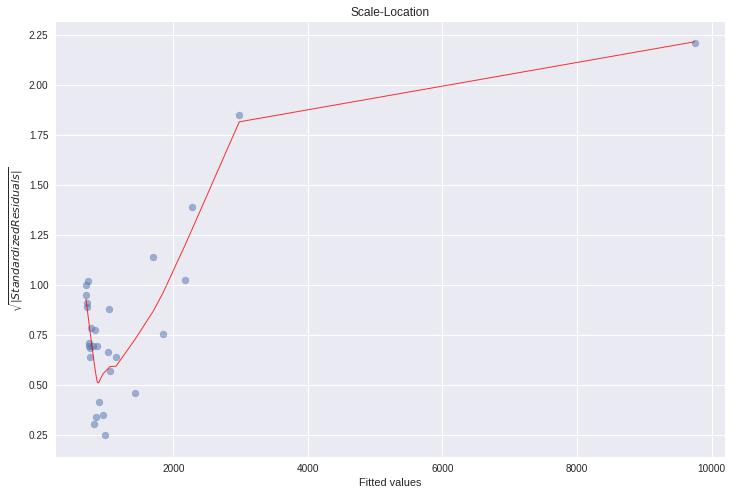

In [97]:
scale_location(mod[1],mod[4])

#### Scale-Location

Let's check if residuals are spread equally along the ranges of predictors



*   The data is not evenly distributed on either side of the line
*   It should be due to outliner
*  Let's check with a Residuals vs Laverage plot if we need to keep all the data


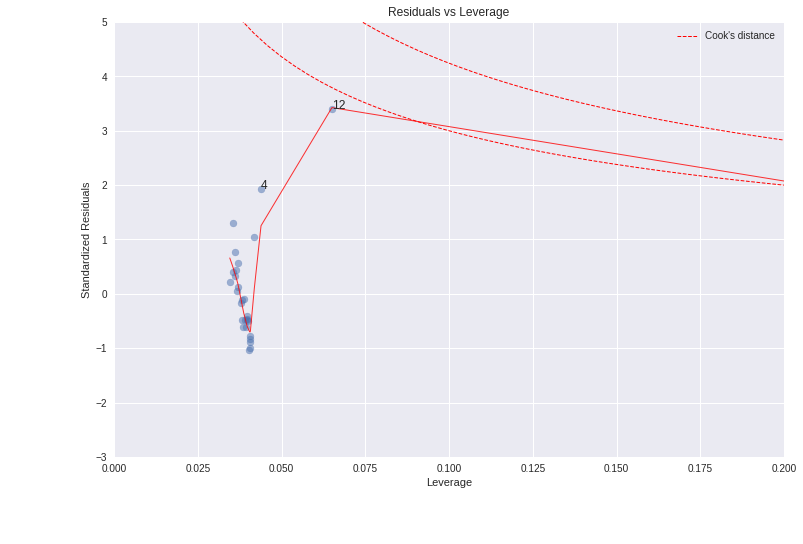

In [98]:
leverage_plot(mod[6],mod[3],mod[0],mod[7])

#### Residuals vs leverage :

This graphic is quite interessting because it showns the influence of the different value our modelisation :  

*   all of the outlier haven't the same influence and so far the same consequence on our modelisation.
*   A case is far beyond the Cook’s distance lines The plot identified the influential observation as #13. So we can guess taht  If we exclude the 13 th case from the analysis, we will have a better modelisation. 


 

Text(0,0.5,'BRW')

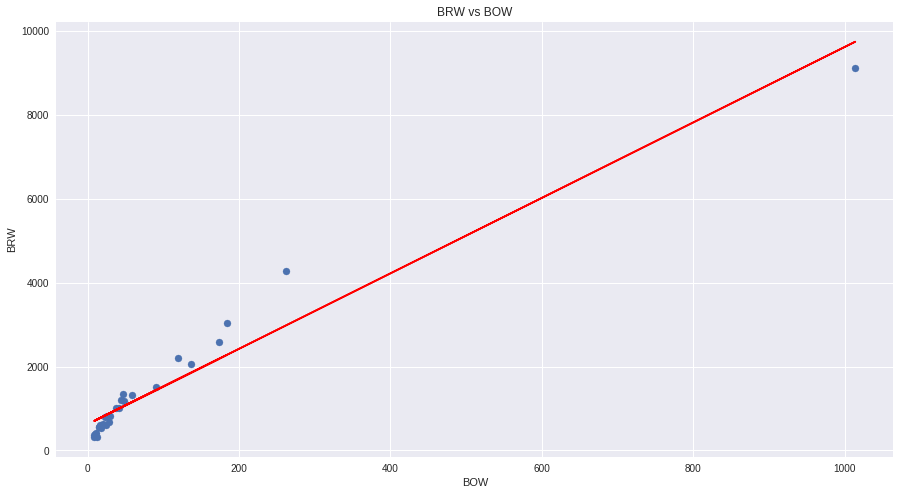

In [99]:
fig,ax=plt.subplots(figsize=(15,8))
plt.scatter(tab.BOW, tab.BRW)
plt.plot(tab.BOW, intercept + slope * tab.BOW, 'r')
plt.title('BRW vs BOW')
plt.xlabel('BOW')
plt.ylabel('BRW')

Here you can have a graphic visualisation of how well our predicted line fit our data


Conclusion:

Even if our model seems to fit well the data, we need to remove the 13th value and check if the model feet better the data. All the more that the adj.R.squared is equal to 0,948 which is inferior to 0,95 and not so good.

### A.3 Second Linear Regression

###1. Create a new array tab2 from which you will remove ”Pteropus vampyrus”

In [71]:
tab.head()


,BOW,BRW,AUD,MOB,HIP
0,136.3,2070.00,9.88,105.77,125.97
1,120.0,2210.00,10.44,107.80,159.80
2,58.7,1310.00,5.48,67.00,97.70
3,48.3,1184.33,4.77,65.27,95.40
4,184.0,3028.00,7.09,213.43,233.30


In [72]:
tab2 = pd.read_csv('tabbats.txt',sep=" ")
tab2 = tab2[tab2["Species"] != "Pteropus vampyrus"]
tab2 = tab2.drop(["id","Species","Diet"],axis=1)

tab2

,BOW,BRW,AUD,MOB,HIP
0,136.30,2070.00,9.88,105.77,125.97
1,120.00,2210.00,10.44,107.80,159.80
2,58.70,1310.00,5.48,67.00,97.70
3,48.30,1184.33,4.77,65.27,95.40
4,184.00,3028.00,7.09,213.43,233.30
5,10.60,414.00,3.74,12.20,35.00
6,24.50,610.00,5.57,18.60,44.95
7,14.60,561.00,2.40,30.05,52.95
8,14.70,570.00,2.13,31.40,53.10
9,29.70,825.00,4.56,68.93,81.40


In [73]:
print('\n',"Dataset infos")
print(tab2.info(),'\n')

print("Attributes type")
print(tab2.dtypes,'\n')

print("Description of the dataset")
tab2.describe()


 Dataset infos
<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 0 to 28
Data columns (total 5 columns):
BOW    28 non-null float64
BRW    28 non-null float64
AUD    28 non-null float64
MOB    28 non-null float64
HIP    28 non-null float64
dtypes: float64(5)
memory usage: 1.3 KB
None 

Attributes type
BOW    float64
BRW    float64
AUD    float64
MOB    float64
HIP    float64
dtype: object 

Description of the dataset


,BOW,BRW,AUD,MOB,HIP
count,28.000000,28.000000,28.000000,28.000000,28.000000
mean,54.326786,1134.821429,8.001429,52.368214,74.560357
std,63.664086,934.175169,5.284254,53.417190,58.851724
min,8.900000,319.000000,2.130000,7.300000,17.100000
25%,15.675000,567.750000,4.720000,18.750000,41.237500
50%,26.885000,802.500000,5.950000,30.410000,52.705000
75%,50.900000,1317.000000,10.260000,67.482500,92.625000
max,262.000000,4290.000000,27.600000,213.430000,258.100000




###2. Do again questions B-2 to B-5 using tab2.

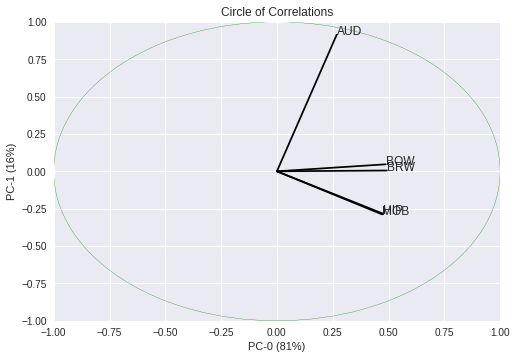

                            OLS Regression Results                            
Dep. Variable:                    BRW   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     1147.
Date:                Thu, 08 Nov 2018   Prob (F-statistic):           4.91e-23
Time:                        18:17:47   Log-Likelihood:                -177.41
No. Observations:                  28   AIC:                             358.8
Df Residuals:                      26   BIC:                             361.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    346.5452     35.492      9.764      0.0

In [74]:
myPCA(tab2)

inputmodel = 'BRW ~ BOW'
mod2 = mymod_function(tab2,inputmodel)



We can notice  :


*   Adj. R-squared has increase : from 0.948 to 0.977
*   The intercept has decrease : from 623.4469  to 346.5452
*   The slope has increase : from  8.9999  to 14.5099




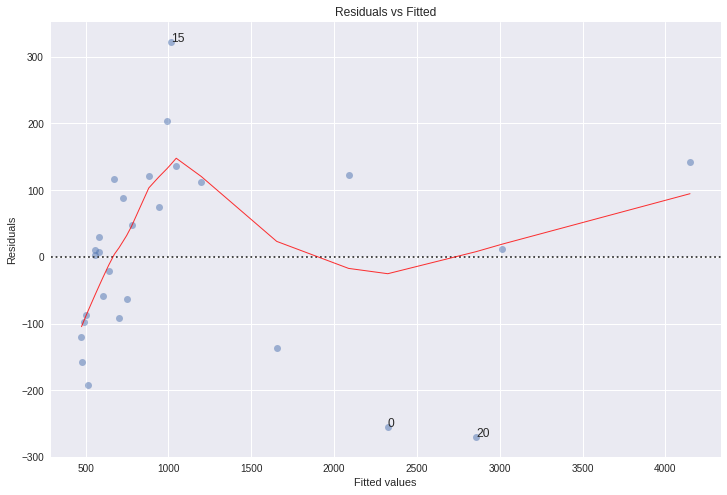

In [75]:
residualVSfitted(mod2[0],'BRW',tab2,mod2[5],mod2[2],mod2[1])

###Resdiuals vs Fitted

* first of all we can see that our graphic is quite different than before, so deleting the #13 has some consequence.

* In fact the coefficent director of the red line is closer to 0 than before

* we can guess this second modelisation is better than the first

Now let's take a look to another indicators 

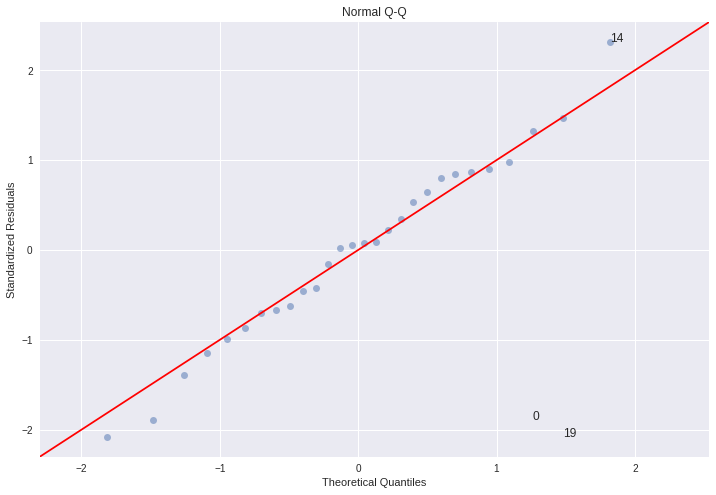

In [76]:
QQ(mod2[3])

#### Normal Quantiles

Let's check if the distribution of the residuals has changed by looking at the Normal Q-Q.



*   The residuals are better lined well on the straight dashed line  
*   No elements are are distants from the line 
*   Our assumption seems to be more plausable


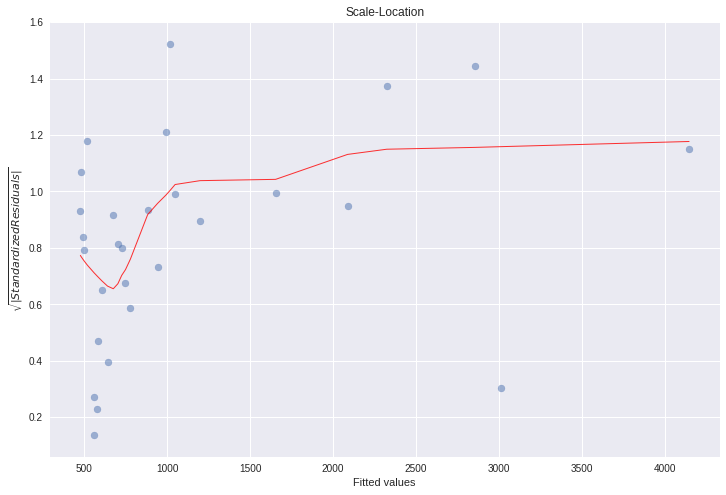

In [77]:
scale_location(mod2[1],mod2[4])

#### Scale-Location

Let's check if residuals are better spread along the ranges of predictors



*   The red line clearly shows an equal separation between the different data.
*   It seems to have no outlier


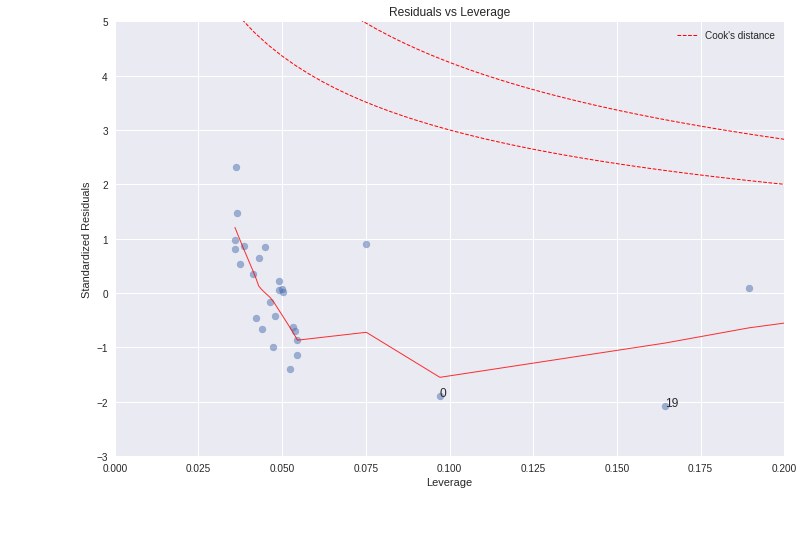

In [78]:
leverage_plot(mod2[6],mod2[3],mod2[0],mod2[7])

###Residuals vs Leverage 

*   This time no value is beyond the cook's line so no value has too much influence and distort the model




Text(0,0.5,'BRW')

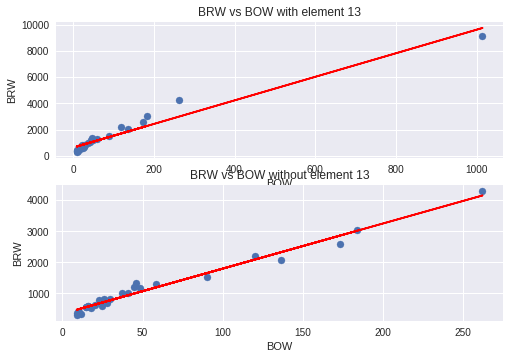

In [79]:
intercept2 = mod2[0].params[0]
slope2 = mod2[0].params[1]





plt.subplot(2, 1, 1)
plt.scatter(tab.BOW, tab.BRW)
plt.plot(tab.BOW, intercept + slope * tab.BOW, 'r')
plt.title('BRW vs BOW with element 13')
plt.xlabel('BOW')
plt.ylabel('BRW')


plt.subplot(2, 1, 2)
plt.scatter(tab2.BOW, tab2.BRW)
plt.plot(tab2.BOW, intercept2 + slope2 * tab2.BOW, 'r')
plt.title('BRW vs BOW without element 13')
plt.xlabel('BOW')
plt.ylabel('BRW')




###Conclusion 

Thanks to the graphics, we can see that our values fit well the data. Moreover, when we compare it to the first modelisation we had the adjusted  R-squared  which was inferior to 0,95 (0,948) and now it's 0,977 so this modelisation is  better than the first one due to the removal of the outlier.

However, it would be interested to have more data to build a better model.


## B. Application to the mansize dataset

In [80]:
#Let's load the mansize data and display it
mansize_df = pd.read_csv("mansize.csv",sep=";")
mansize_df.head()

,Age,Height (cm),Weight (kg),Femur Length (cm),Feet Size (cm),Arm span (cm),Hand length (cm),Cranial volume (cm3),Penis size (cm)
0,21,195,71.0,59.4,30.0,203.2,22.6,1442,11.7
1,21,184,82.4,54.3,24.3,192.1,18.6,1366,12.8
2,18,169,96.7,45.1,21.5,176.2,16.6,1436,13.8
3,21,166,68.2,42.4,21.3,181.6,18.1,1375,14.8
4,18,175,56.5,46.9,24.9,183.9,19.1,1376,13.4


Here are the correclation we have noticed in the TP2:

• femur length and height

• feet size and height

• arm span and height

• hand length and height

• femur length and feet size

• arm span and femur length

• hand length and femur length

• arm span and feet size

• hand length and feet size

• hand length and arm span



### Let's do a quick Principal component analysis of the mansize dataset and draw the correlation circle in order to find correlated variables.

Knowing that we use python, we had to code a function to display the circle. This function is available in the appendix.


**Interpretation** :




*   We can see on the plot that we keep 68% of the variance if we want to represent the dataset in 2 dimensions, which means that the loss of information is huge 
*   The dimension with the most explained variance is called PC-0 and plotted on the horizontal axes (56%)
*   The second-most explanatory dimension is called PC-1 and placed on the vertical axis (12%)
*   Since most of the variables are pointing to the right, they are at least somewhat correlating on this first principal component PC-0
*   The femur length the arm length and the heigth attributes are bunched right close together(pointing right)
*   It seems to have no correlation between the rest of the dataset



According to the previous question, the most correllated variables are : 


 - The femur length and the arm length 
 - The arm length and the heigth
 -   The height and the femur length



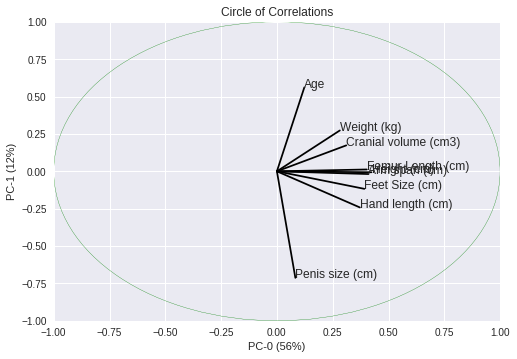

,height,femur
0,195,59.4
1,184,54.3
2,169,45.1
3,166,42.4
4,175,46.9


In [81]:
myPCA(mansize_df)
mansize_df = mansize_df[["Height (cm)","Femur Length (cm)"]]
mansize_df.columns = ['height','femur']
mansize_df.head()


We can see on the graph above that there is a linear relation between the femur heigth and the heigth. Let's perform a linear regression

Text(0,0.5,'Man Height')

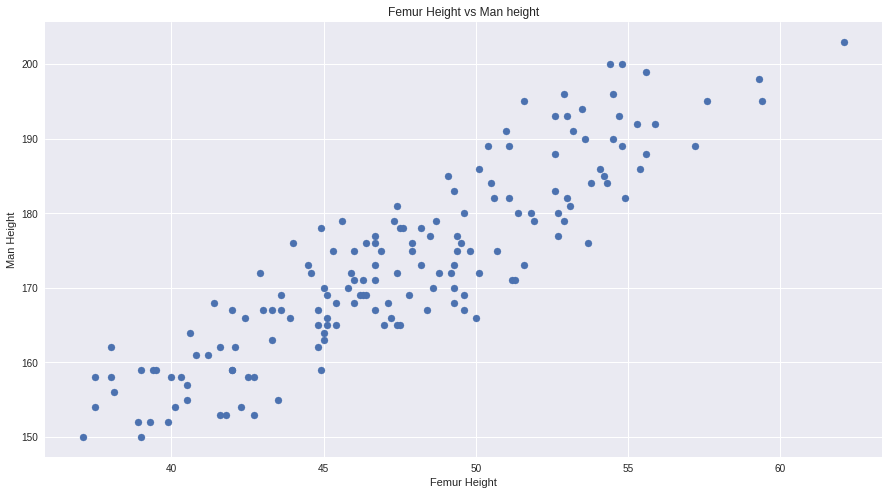

In [82]:
fig,ax=plt.subplots(figsize=(15,8))
plt.scatter(mansize_df.femur, mansize_df.height)
plt.title('Femur Height vs Man height')
plt.xlabel('Femur Height')
plt.ylabel('Man Height')

In [83]:
input = 'height ~ femur'
mod_mansize = mymod_function(mansize_df,input)


                            OLS Regression Results                            
Dep. Variable:                 height   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     609.6
Date:                Thu, 08 Nov 2018   Prob (F-statistic):           2.82e-56
Time:                        18:17:54   Log-Likelihood:                -505.76
No. Observations:                 161   AIC:                             1016.
Df Residuals:                     159   BIC:                             1022.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     72.9609      4.085     17.860      0.0

*   The intercept b is equal to 72.9609  with a standard error of 4.085
*   The slope m is equal to 2.1101  with a standard error of 0.085

So we can determine that one possible equation of linear regression is :

BRW= BOW*2.1101+ 72.9609


The Adj R-squared value  is equal to 0.792, it means that this model explains 79.2% of the variance in our dependent variable.

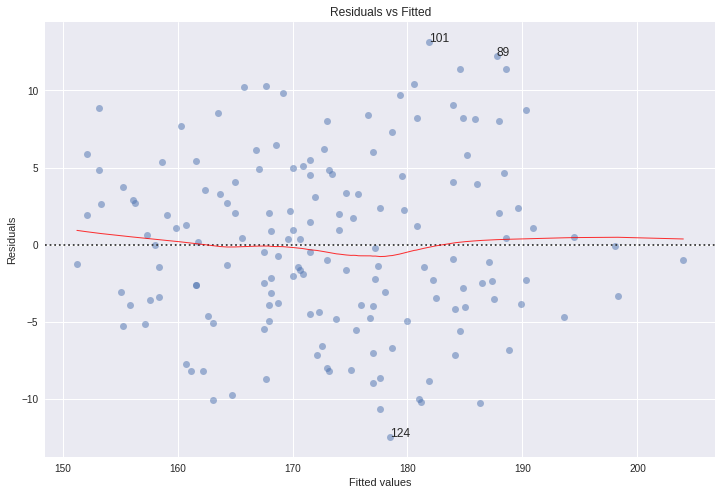

In [84]:
residualVSfitted(mod_mansize[0],'height',mansize_df,mod_mansize[5],mod_mansize[2],mod_mansize[1])

###Residuals vs Fitted 

*   In this case the coefficient director is really near to 0 so the model seems to be very good and predictive 




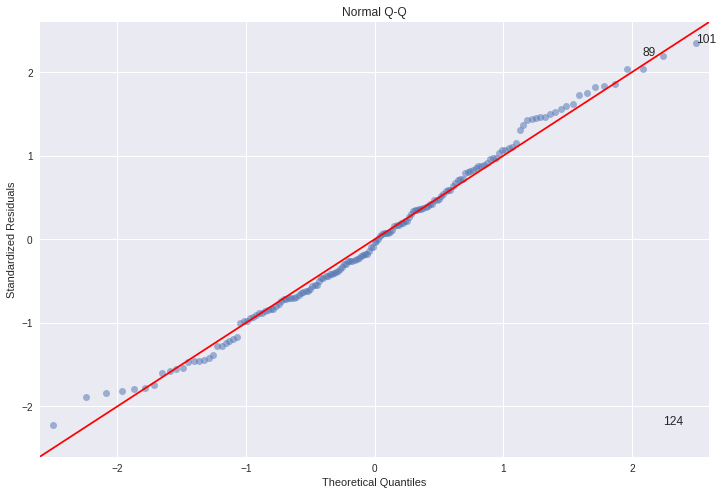

In [85]:
QQ(mod_mansize[3])

#### Normal Quantiles

Let's check if the residuals are normally distributed by looking at the Normal Q-Q.



*   The residuals are lined well on the straight dashed line 
*   There is no outlier
*   Our assumption seems to be plausable


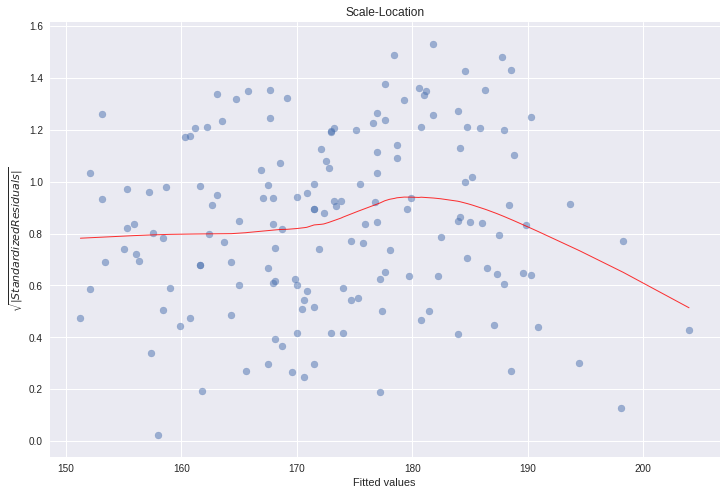

In [86]:
scale_location(mod_mansize[1],mod_mansize[4])

#### Scale-Location

Let's check if residuals are spread equally along the ranges of predictors



*   The data is not well distributed on either side of the line
*  Let's check with a Residuals vs Laverage plot if we need to keep all the data


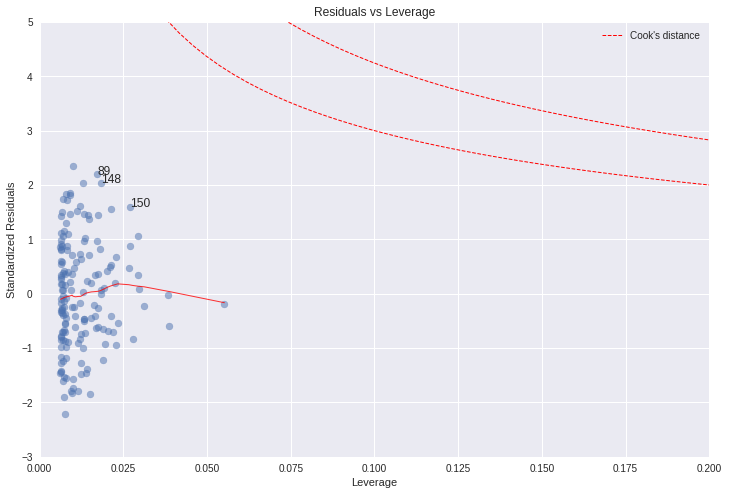

In [87]:
leverage_plot(mod_mansize[6],mod_mansize[3],mod_mansize[0],mod_mansize[7])

###Residuals vs Leverage 


*   we can see that all our data is outside of the Cook's distance, so we can keep all our data without any problem of distorting our modelisation.




Text(0,0.5,'Man Height')

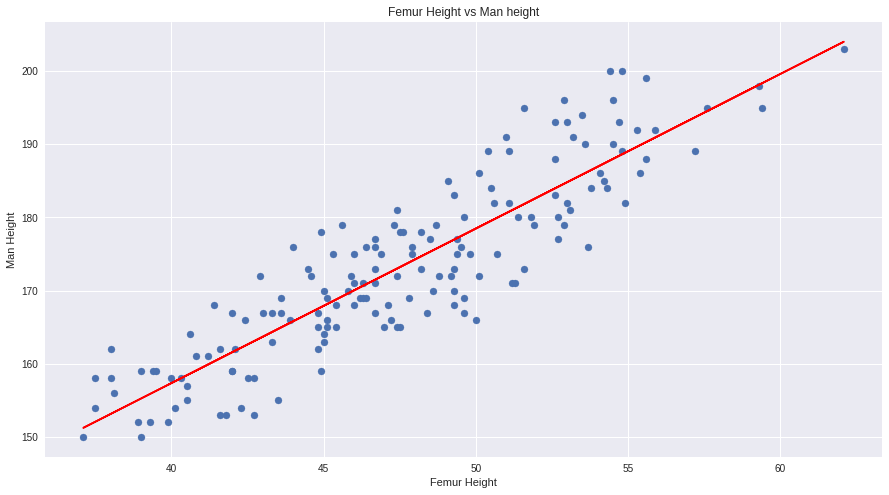

In [88]:
intercept_mansize = mod_mansize[0].params[0]
slope_mansize = mod_mansize[0].params[1]


fig,ax=plt.subplots(figsize=(15,8))
plt.scatter(mansize_df.femur, mansize_df.height)
plt.plot(mansize_df['femur'], 
         intercept_mansize + slope_mansize * mansize_df['femur'], 'r')

plt.title('Femur Height vs Man height')
plt.xlabel('Femur Height')
plt.ylabel('Man Height')

 Conclusion :

Thanks to all of our indicators we can guess that our modelisation is quite good :

*  p-values are close to zeros
*  Adj R-squared value  is equal to 0.792
* We can see on the plot that all criteria of validations are respected
*  Thus, the Height of an individual and its Femur Length are strongly correlated.


